### MATH 4500 Final Project: Topic 1
By Matthew Lawson

# Problem 1B:

In [62]:
import numpy as np
import matplotlib.pyplot as plt

payments = np.repeat([200, 275, 312, 380, 400], 12)
target_value = 24738

# f(r)
def f(r):
    x = 1 + r
    exponents = np.arange(len(payments)-1, -1, -1)
    return np.sum(payments * x**exponents) - target_value

# Secant method (altered to track iteration history for convergence table)
def secant_method(f, r0, r1, tol=1e-8, max_iter=100):
    history = [(0, r0, f(r0)), (1, r1, f(r1))]
    f0, f1 = history[0][2], history[1][2]
    for k in range(2, max_iter+1):
        r2 = r1 - f1 * (r1 - r0) / (f1 - f0)
        f2 = f(r2)
        history.append((k, r2, f2))
        if abs(r2 - r1) < tol:
            break
        r0, f0, r1, f1 = r1, f1, r2, f2
    return history[-1][1], history

# compute the root and iteration history
r_root, conv_history = secant_method(f, 0, 0.02)

# Print convergence table
print("Secant Method Convergence Table:")
print(f"{'Iter':>4} | {'r':>12} | {'f(r)':>14}")
print("-" * 36)
for it, r_val, f_val in conv_history:
    print(f"{it:4d} | {r_val:12.10f} | {f_val:14.6e}")
print(f"\nEstimated monthly interest rate: {r_root:.8f} ({r_root*100:.4f}%)")

Secant Method Convergence Table:
Iter |            r |           f(r)
------------------------------------
   0 | 0.0000000000 |  -5.934000e+03
   1 | 0.0200000000 |   8.284542e+03
   2 | 0.0083468475 |  -1.241962e+03
   3 | 0.0098660589 |  -2.232726e+02
   4 | 0.0101990340 |   7.763471e+00
   5 | 0.0101878451 |  -4.648093e-02
   6 | 0.0101879116 |  -9.604064e-06
   7 | 0.0101879117 |   2.182787e-11

Estimated monthly interest rate: 0.01018791 (1.0188%)


Checks:

In [63]:
# 1) Residual check
residual = f(r_root)
print(f"Residual at r* = {residual:.6e}  # should be near zero")

# 2) Accumulated‐value check
exponents = np.arange(len(payments)-1, -1, -1)
accumulated = np.sum(payments * (1 + r_root)**exponents)
print(f"Accumulated value at r* = {accumulated:.6f}  # should equal target {target_value}")

# 3) Bisection cross‐check
def bisection(f, a, b, tol=1e-8, max_iter=100):
    fa, fb = f(a), f(b)
    if fa * fb > 0:
        raise ValueError("Bisection endpoints must bracket the root")
    for _ in range(max_iter):
        m = 0.5*(a + b)
        fm = f(m)
        if abs(fm) < tol or (b - a)/2 < tol:
            return m
        if fa * fm <= 0:
            b, fb = m, fm
        else:
            a, fa = m, fm
    return 0.5*(a + b)

r_bis = bisection(f, 0.0, 0.02)
print(f"Bisection root = {r_bis:.10f}")
print(f"Difference secant−bisection = {abs(r_root - r_bis):.6e}")

Residual at r* = 2.182787e-11  # should be near zero
Accumulated value at r* = 24738.000000  # should equal target 24738
Bisection root = 0.0101879025
Difference secant−bisection = 9.207767e-09


Plots:

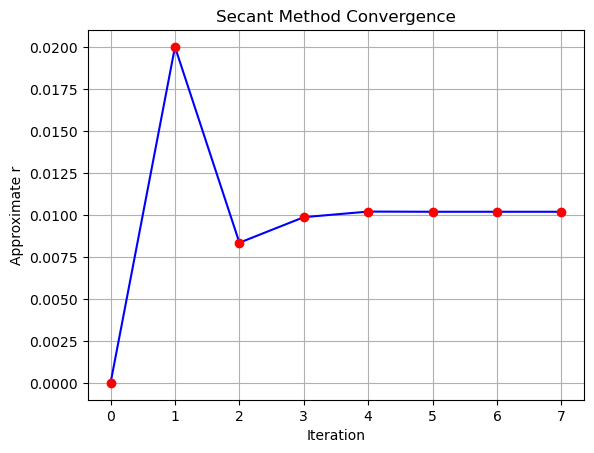

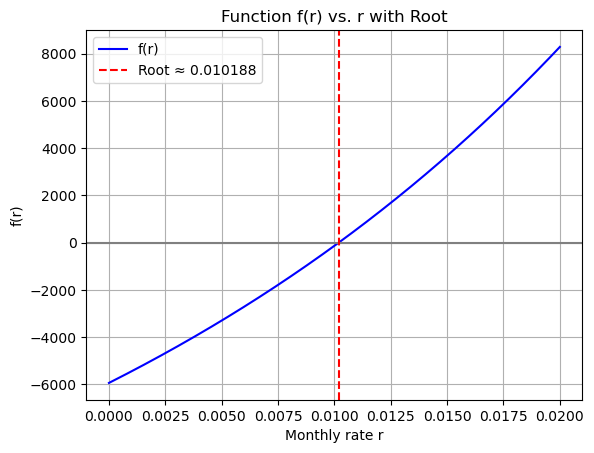

In [64]:
# Prepare f(r) values for function plot
r_vals = np.linspace(0.0, 0.02, 400)
f_vals = [f(r) for r in r_vals]

# pull iteration data for table
iterations = [it for it, _, _ in conv_history]
r_values  = [r  for _, r, _ in conv_history]

# 1) Secant Method Convergence
plt.figure()
plt.plot(iterations, r_values, color='blue', marker='o', markerfacecolor='red', markeredgecolor='red')
plt.xlabel('Iteration')
plt.ylabel('Approximate r')
plt.title('Secant Method Convergence')
plt.grid(True)
plt.show()

# 2) Function f(r) vs. r with Root
plt.figure()
plt.plot(r_vals, f_vals, color='blue', label='f(r)')
plt.axhline(0, color='grey', linestyle='-')
plt.axvline(r_root, color='red', linestyle='--', label=f'Root ≈ {r_root:.6f}')
plt.xlabel('Monthly rate r')
plt.ylabel('f(r)')
plt.title('Function f(r) vs. r with Root')
plt.grid(True)
plt.legend()
plt.show()

# Problem 2:

In [65]:
# f2(r) and derivative funcs
def f2(r):
    x = 1 + r
    return x**44 - 2*x**38 + 1

def f2prime(r):
    x = 1 + r
    return 44 * x**43 - 76 * x**37

# Newton’s Method
def newton_method(func, dfunc, r0, tol=1e-8, max_iter=100):
    history = [(0, r0, func(r0))]
    r = r0
    for k in range(1, max_iter+1):
        f_val = func(r)
        df_val = dfunc(r)
        r_next = r - f_val / df_val
        history.append((k, r_next, func(r_next)))
        if abs(r_next - r) < tol:
            break
        r = r_next
    return r_next, history

# run newtons
r0 = 0.1
r_newton, hist_newton = newton_method(f2, f2prime, r0)

# Print convergence table 
print("Newton’s Method Convergence:")
print(f"{'Iter':>4} | {'r':>12} | {'f2(r)':>14}")
print("-" * 36)
for it, r_val, f_val in hist_newton:
    print(f"{it:4d} | {r_val:12.10f} | {f_val:14.6e}")
print(f"\nFinal root:")
print(f"Newtons ≈ {r_newton:.10f}")

Newton’s Method Convergence:
Iter |            r |          f2(r)
------------------------------------
   0 | 0.1000000000 |  -7.544611e+00
   1 | 0.2138586608 |   1.894185e+03
   2 | 0.1913715374 |   6.678339e+02
   3 | 0.1707864758 |   2.312600e+02
   4 | 0.1526544305 |   7.733759e+01
   5 | 0.1378266344 |   2.397736e+01
   6 | 0.1274653775 |   6.164547e+00
   7 | 0.1224033363 |   9.494943e-01
   8 | 0.1212972205 |   3.720680e-02
   9 | 0.1212502293 |   6.450975e-05
  10 | 0.1212501475 |   1.950298e-10
  11 | 0.1212501475 |  -1.421085e-13

Final root:
Newtons ≈ 0.1212501475


In [76]:
def bisection_method(f, a, b, tol=1e-8, max_iter=100):
    # Check if f(a) and f(b) have opposite signs
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs")

    history = []
    iterations = 0
    print("\nBisection Method Convergece:")
    print("Iter | a          | b          | c          | f(c)")
    print("-" * 60)

    while (b - a) / 2 > tol and iterations < max_iter:
        c = (a + b) / 2
        fc = f(c)
        history.append((iterations, c, fc))
        print(f"{iterations:4d} | {a:.8f} | {b:.8f} | {c:.8f} | {fc:.6e}")

        if fc == 0 or (b - a) / 2 < tol:
            break
        elif f(a) * fc < 0:
            b = c
        else:
            a = c
        iterations += 1
    return c, history

# Run Bisection
r_bis, hist_bis = bisection_method(f2, 0.05, 0.20)
print(f"\nFinal root:")
print(f"Bisection ≈ {r_bis:.10f}")



Bisection Method Convergece:
Iter | a          | b          | c          | f(c)
------------------------------------------------------------
   0 | 0.05000000 | 0.20000000 | 0.12500000 | 3.397420e+00
   1 | 0.05000000 | 0.12500000 | 0.08750000 | -7.379083e+00
   2 | 0.08750000 | 0.12500000 | 0.10625000 | -6.755510e+00
   3 | 0.10625000 | 0.12500000 | 0.11562500 | -3.602156e+00
   4 | 0.11562500 | 0.12500000 | 0.12031250 | -7.146158e-01
   5 | 0.12031250 | 0.12500000 | 0.12265625 | 1.168589e+00
   6 | 0.12031250 | 0.12265625 | 0.12148438 | 1.864198e-01
   7 | 0.12031250 | 0.12148438 | 0.12089844 | -2.739254e-01
   8 | 0.12089844 | 0.12148438 | 0.12119141 | -4.624826e-02
   9 | 0.12119141 | 0.12148438 | 0.12133789 | 6.945703e-02
  10 | 0.12119141 | 0.12133789 | 0.12126465 | 1.144781e-02
  11 | 0.12119141 | 0.12126465 | 0.12122803 | -1.743929e-02
  12 | 0.12122803 | 0.12126465 | 0.12124634 | -3.005514e-03
  13 | 0.12124634 | 0.12126465 | 0.12125549 | 4.218704e-03
  14 | 0.12124634 | 0.12

# Problem 3:

In [84]:
# Define f3(r)
def f3(r):
    x = 1 + r
    return x**720 - 6 * x**240 + 5

# Secant method 
def secant_method(func, r0, r1, tol=1e-10, max_iter=100):
    hist = [(0, r0, func(r0)), (1, r1, func(r1))]
    f0, f1 = hist[0][2], hist[1][2]
    for k in range(2, max_iter + 1):
        r_next = r1 - f1 * (r1 - r0) / (f1 - f0)
        f_next = func(r_next)
        hist.append((k, r_next, f_next))
        if abs(r_next - r1) < tol:
            break
        r0, f0, r1, f1 = r1, f1, r_next, f_next
    return hist

#run secant
hist_secant = secant_method(f3, 0.002, 0.004)
r_root = hist_secant[-1][1]

# swap to annual rate
effective_annual = (1 + r_root)**12 - 1

# Print convergence table
print("Secant Method Convergence:")
print(f"{'Iter':>4} | {'r (monthly)':>14} | {'f3(r)':>14}")
print("-" * 40)
for it, r_val, f_val in hist_secant:
    print(f"{it:4d} | {r_val:14.10f} | {f_val:14.6e}")
print(f"\nFinal root (monthly): r = {r_root:.10f}")
print(f"Effective annual rate: {effective_annual*100:.6f}%\n")

Secant Method Convergence:
Iter |    r (monthly) |          f3(r)
----------------------------------------
   0 |   0.0020000000 |  -4.771690e-01
   1 |   0.0040000000 |   7.072028e+00
   2 |   0.0021264158 |  -3.743501e-01
   3 |   0.0022206061 |  -2.791133e-01
   4 |   0.0024966522 |   1.058001e-01
   5 |   0.0024207762 |  -1.707358e-02
   6 |   0.0024313193 |  -8.207359e-04
   7 |   0.0024318517 |   6.898990e-06
   8 |   0.0024318473 |  -2.749934e-09
   9 |   0.0024318473 |   9.681145e-14

Final root (monthly): r = 0.0024318473
Effective annual rate: 2.957566%



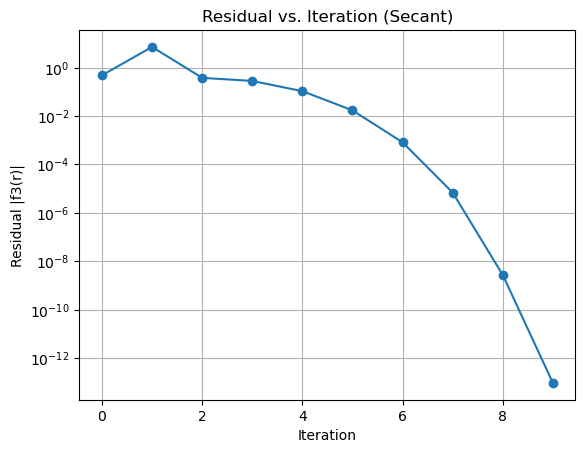

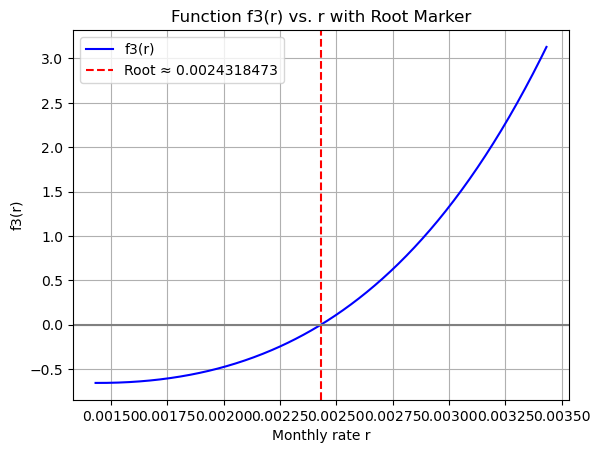

In [83]:

# Prepare data for residual plot
iterations = [it for it, r, f in hist_secant]
residuals = [abs(f) for it, r, f in hist_secant]

plt.figure()
plt.semilogy(iterations, residuals, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Residual |f3(r)|')
plt.title('Residual vs. Iteration (Secant)')
plt.grid(True)
plt.show()

# Prepare data for function plot around the root
r_vals = np.linspace(r_root - 0.001, r_root + 0.001, 400)
f_vals = [f3(r) for r in r_vals]

plt.figure()
plt.plot(r_vals, f_vals, color='blue', label='f3(r)')
plt.axhline(0, color='grey', linestyle='-')
plt.axvline(r_root, color='red', linestyle='--', label=f'Root ≈ {r_star:.10f}')
plt.xlabel('Monthly rate r')
plt.ylabel('f3(r)')
plt.title('Function f3(r) vs. r with Root Marker')
plt.legend()
plt.grid(True)
plt.show()